In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time as Time
import os
import json

from ssfmPack import ssfm, utils

# Function Initialization

In [2]:
ssfmFunc = ssfm.ssfm()

In [3]:
def sechPulse(time, amplitude, pulse_width):
    return amplitude/np.cosh(time/pulse_width)

def gaussPulse(time,amplitude, pulse_width): 
    return amplitude*np.exp(-(time/pulse_width)**2)

def twinGaussPulse(time, amplitude, pulse_width, delay = None):
    if delay is None:
        delay = 2*pulse_width
    return (amplitude * np.exp(-((time - delay) / pulse_width) ** 2) +
            amplitude * np.exp(-((time + delay) / pulse_width) ** 2))

def charLength(pulsewidth, beta2):
    return np.pi/2*pulsewidth**2/np.abs(beta2)


In [4]:
pulsewidth = 0.58
timesteps = 2**13
zsteps = 2**12


#fiberparam
gamma = 18.4e-3 #Nonlinearity parameter in W/m
betas = [-5.23e-3, 4.27e-5] #Dispersion in fs^2/m
alpha = 0.05*np.log(10)/10 #Power attenuation coef in Nepers/m
length = 13

timeArr = np.linspace(-20*pulsewidth, 20*pulsewidth, timesteps) 
lengthArr = np.linspace(0, length, zsteps)
A = np.sqrt(22.05)
initial = sechPulse(timeArr, A, pulsewidth)
pulseMatrix, spectrumMatrix = ssfmFunc.SSFM(timeArr, lengthArr, initial,
                                               alpha, betas, gamma)

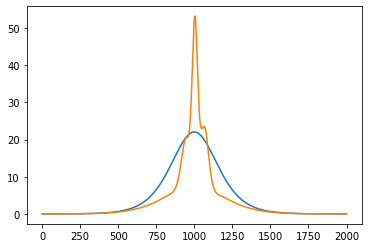

In [8]:
plt.plot(utils.clipMatrix(initial**2, 1000))
plt.plot(utils.clipMatrix(np.abs(pulseMatrix[-1])**2, 1000))

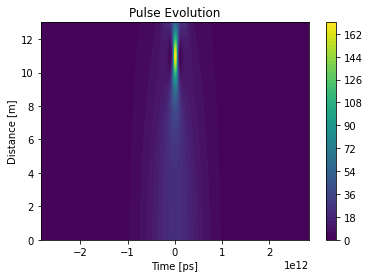

In [9]:
fig, ax = plt.subplots() 
utils.plotPulse2D(fig, ax, timeArr, lengthArr, pulseMatrix, nrange = 1000)

In [10]:
clipped_timeArr = utils.clipMatrix(timeArr, nrange = 1000)
pulse = utils.clipMatrix(pulseMatrix, nrange = 1000)
np.save('results/Cpulse.npy', pulse) 
np.save('results/CtimeArr.npy', clipped_timeArr)
np.save('results/ClengthArr.npy', lengthArr)

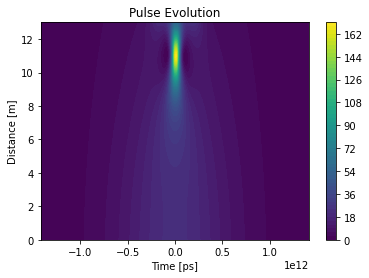

In [13]:
fig, ax = plt.subplots()
utils.plotPulse2D(fig, ax, clipped_timeArr, lengthArr, pulse, nrange = 500)

 # UltraShort 

In [34]:
pulsewidth = 0.59e-12
timesteps = 2**13
zsteps = 2**10
amplitude = np.sqrt(22.05)

#fiberparam
gamma = 18.4e-3 #Nonlinearity parameter in W/m
beta2 = [-5.23e-27, 4.27e-41] #Dispersion in s^2/m
alpha = 0.05e-3*np.log(10)/10 #Power attenuation coef in Nepers/m
length = 13

timeArr = np.linspace(-100*pulsewidth, 100*pulsewidth, timesteps) 
lengthArr = np.linspace(0, length, zsteps)
initial = sechPulse(timeArr, amplitude, pulsewidth)

pulseMatrix, spectrumMatrix = ssfmFunc.SSFM(timeArr, lengthArr, initial,
                                               alpha, beta2, gamma)

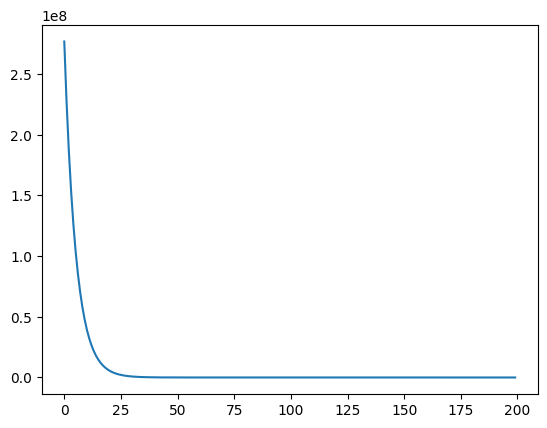

In [14]:
plt.plot(np.abs(utils.clipMatrix(pulseMatrix[0], 100))**2)

In [33]:
clipped_timeArr = utils.clipMatrix(timeArr, nrange = 400)
pulse = utils.clipMatrix(pulseMatrix, nrange = 400)
np.save('results/Cpulse.npy', pulse) 
np.save('results/CtimeArr.npy', clipped_timeArr)
np.save('results/ClengthArr.npy', lengthArr)

In [35]:
pulseN = pulse/np.sqrt(np.abs(np.max(pulse))**2)

In [36]:
np.max(np.abs(pulse))

14.25627977684668

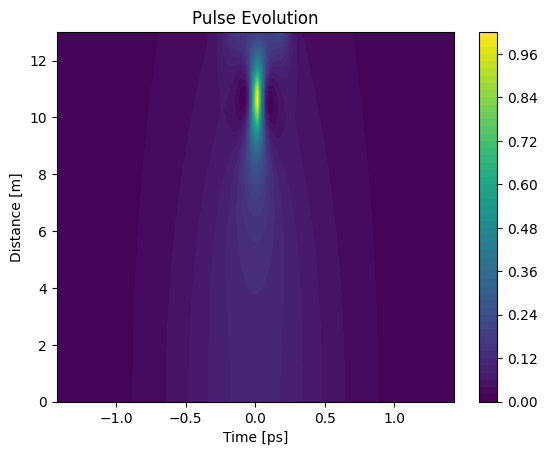

In [37]:
fig, ax = plt.subplots() 
utils.plotPulse2D(fig, ax, clipped_timeArr, lengthArr, pulseN, nrange = 50)